In [17]:
import pandas as pd
import numpy as np
import sqlite3 as sql


In [46]:
#connection to database 
database= 'Soccer.sqlite'
connection= sql.connect(database)

# Entity-Relationship Diagram

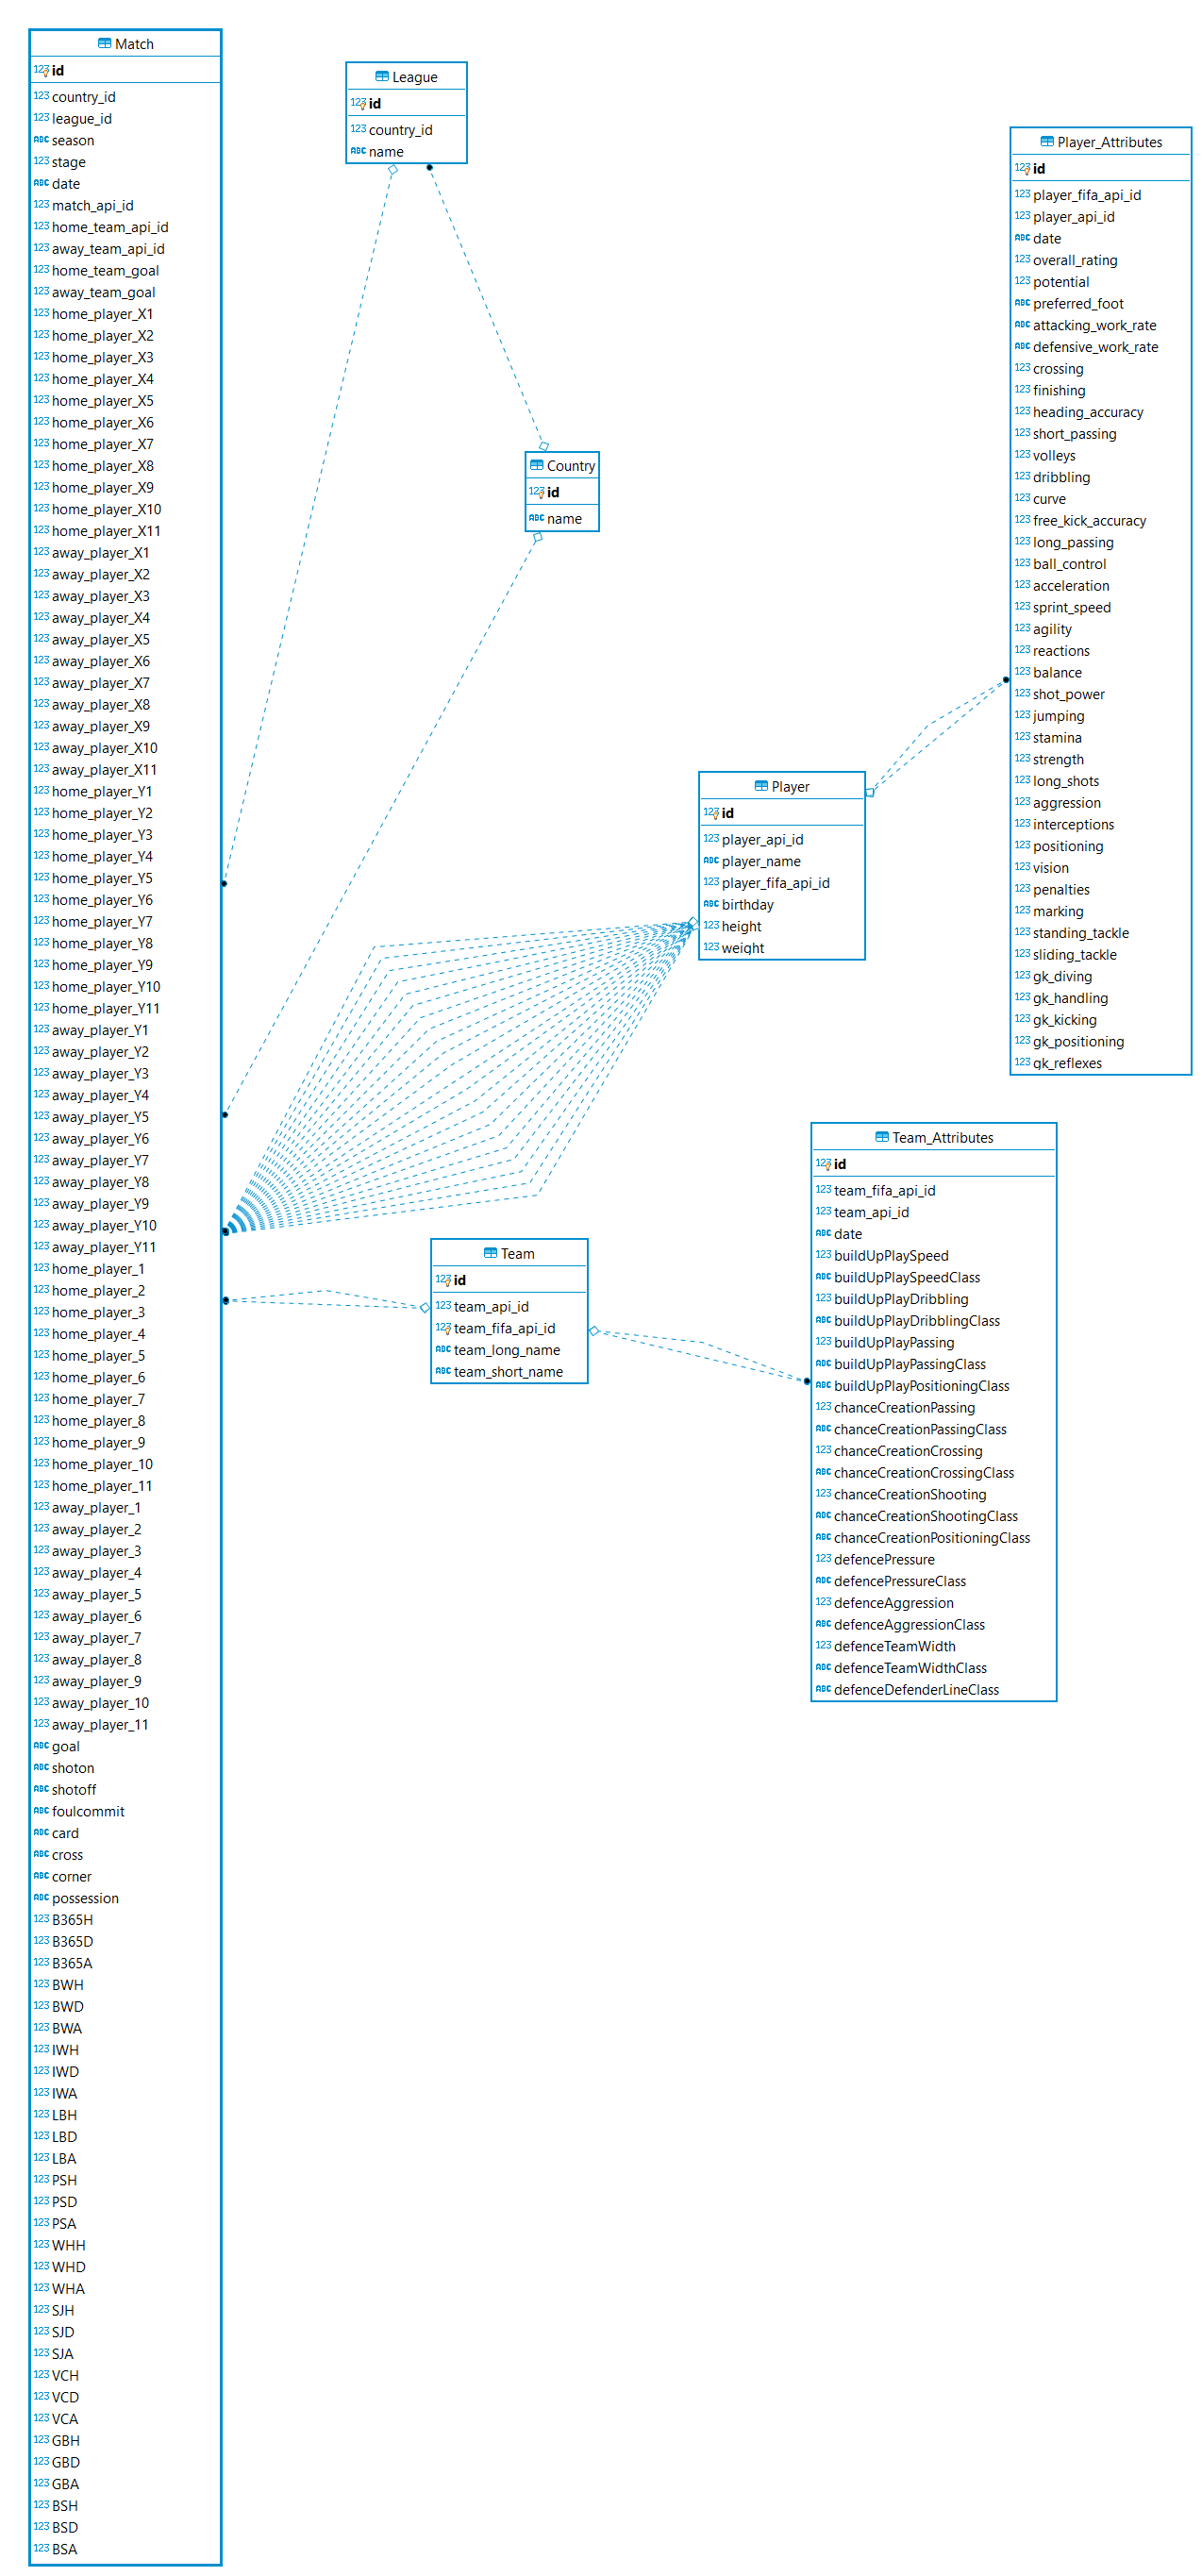

In [162]:
from IPython.display import Image
Image(r'C:\Users\bellcsa\OneDrive - Lam Research\Desktop\Portfolio\SCDiagram.png')

# Tables from database

In [161]:
tables = pd.read_sql('''SELECT *
                        FROM sqlite_master
                        WHERE type='table';'''
                        ,connection)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


# Columns in Country and League tables

In [47]:
Countries= pd.read_sql_query('''SELECT * 
                             FROM Country'''
                             ,connection)
Countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [48]:
League= pd.read_sql_query('''SELECT 
                          * FROM League'''
                          ,connection)
League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


# COUNT of columns in League table

In [113]:
League_count= pd.read_sql_query('''SELECT COUNT (*) 
                                FROM League'''
                                ,connection)
League_count

,COUNT (*)
0,11


# Visualizing players' average performance by their preferred foot

In [111]:
Player_performance= pd.read_sql_query('''Select 
                                       preferred_foot
                                       ,AVG(ball_control) AS ball_control
                                       ,AVG(shot_power) AS shot_power
                                       ,AVG(agility) AS agility
                                       ,AVG(free_kick_accuracy) as free_kick_accuracy
                                       FROM Player_Attributes WHERE (preferred_foot is Not Null)
                                       GROUP BY preferred_foot'''
                                       ,connection)
Player_performance

,preferred_foot,ball_control,shot_power,agility,free_kick_accuracy
0,left,65.416941,63.448215,67.413116,53.283929
1,right,62.733421,61.278457,65.504275,48.119530


# Selecting players with specific height and weight

In [146]:
P= pd.read_sql_query('''SELECT player_api_id
                        ,player_name
                        ,height
                        ,weight
                        FROM Player
                        WHERE Height>70  
                        AND Weight<170'''
                        ,connection); 
P

,player_api_id,player_name,height,weight
0,155782,Aaron Cresswell,170.18,146
1,162549,Aaron Doran,170.18,163
2,23780,Aaron Hughes,182.88,154
3,27316,Aaron Hunt,182.88,161
4,564793,Aaron Kuhl,172.72,146
...,...,...,...,...
5798,491794,Zoran Josipovic,187.96,165
5799,99031,Zoran Tosic,170.18,157
5800,192132,Zouhaier Dhaouadhi,180.34,159
5801,26357,Zoumana Camara,182.88,168


# Selecting teams with fifa api id < 15 and ordering table by this feature

In [114]:
teams = pd.read_sql(''' SELECT * 
                        FROM Team
                        WHERE team_fifa_api_id < 15
                        ORDER BY team_fifa_api_id
                    ''', connection)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,3459,9825,1,Arsenal,ARS
1,3465,10252,2,Aston Villa,AVL
2,3468,8655,3,Blackburn Rovers,BLB
3,3471,8559,4,Bolton Wanderers,BOL
4,3475,8455,5,Chelsea,CHE
5,3467,8668,7,Everton,EVE
6,3462,8650,9,Liverpool,LIV
7,3466,8456,10,Manchester City,MCI
8,3457,10260,11,Manchester United,MUN
9,3469,8549,12,Middlesbrough,MID


# Joining League and Country table

In [82]:
leagues = pd.read_sql('''Select League.country_id
                         ,League.name As league_name
                         ,Country.name AS country_name
                         from League 
                         INNER JOIN Country
                         ON League.id = Country.id
                         ;
                      ''',connection)
leagues

,country_id,league_name,country_name
0,1,Belgium Jupiler League,Belgium
1,1729,England Premier League,England
2,4769,France Ligue 1,France
3,7809,Germany 1. Bundesliga,Germany
4,10257,Italy Serie A,Italy
5,13274,Netherlands Eredivisie,Netherlands
6,15722,Poland Ekstraklasa,Poland
7,17642,Portugal Liga ZON Sagres,Portugal
8,19694,Scotland Premier League,Scotland
9,21518,Spain LIGA BBVA,Spain


# Selecting to display only the Portuguese OR Spanish Leagues

In [144]:
leagues = pd.read_sql('''Select League.country_id
                         ,League.name As league_name
                         ,Country.name AS country_name
                         from League 
                         INNER JOIN Country
                         ON League.id = Country.id
                         WHERE country_name= 'Spain' OR country_name= 'Portugal'
                         ;
                         ''',connection)
leagues

,country_id,league_name,country_name
0,17642,Portugal Liga ZON Sagres,Portugal
1,21518,Spain LIGA BBVA,Spain


# Number of players that have the same birthday and were born after 1995 (HAVING command)

In [72]:
young_players_with_the_same_birthday = pd.read_sql_query(''' SELECT 
                                                             COUNT(player.player_name) AS number_of_players, 
                                                             strftime('%Y',Player.birthday) AS "year_born"
                                                             FROM Player
                                                             INNER JOIN Player_Attributes
                                                             ON Player.player_api_id = Player_Attributes.player_api_id
                                                             GROUP BY year_born
                                                             HAVING year_born > '1995'
                                                          ''', connection)
young_players_with_the_same_birthday

,number_of_players,year_born
0,2291,1996
1,897,1997
2,135,1998
3,10,1999
